In [42]:
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")
df = pd.read_csv(path + "/" + csv_files[0])
print("Path to dataset files:", path)

# So how to import the dataset?


Path to dataset files: C:\Users\vpthi\.cache\kagglehub\datasets\abhishek14398\salary-dataset-simple-linear-regression\versions\1


In [43]:
# Presume that the YearExperience is the x feature and Salary is the target variable y
x_train = df["YearsExperience"].values
y_train = df["Salary"].values
# Usually, in C++, people define index as numbers. But, in Python, we can directly use the column names. 
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
# 30 Training examples in total.

x_train shape: (30,)
y_train shape: (30,)


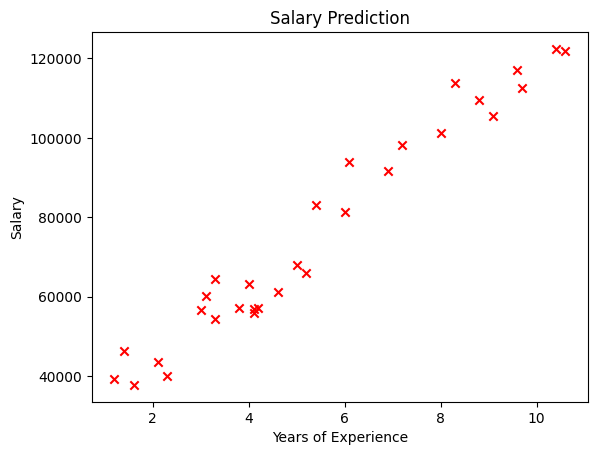

In [44]:
# First off, we need to visualize the data by using pyplot
plt.scatter(x_train, y_train, c = 'r', marker = 'x') 
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()

In [45]:
# First, we need to create a cost function
def compute_cost(x, y, w, b):
    m = len(x)
    total_cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost = total_cost / (2*m)
    return total_cost
# So, what does the cost function do exactly?
# Basically, the cost function testify whether that our prediction is good or not.
# If the cost is high, then our prediction is bad. If the cost is low, then our prediction is good.
# So, how can we come up with such a formula as this?
# We can use the Mean Squared Error (MSE) as our cost function to measure the average squared difference between the prediction and the data.
# Another reason is that we want to penalize the larger errors more than the smaller errors.
# So we square the errors to make them positive and to penalize the larger errors more.
# Finally, we divide by 2m to make the cost smaller and to make the calculations later easier.

# Let's test the cost function by randomizing w and b.

w = np.random.rand(1)
b = np.random.rand(1)
compute_cost(x_train, y_train, w, b)
# The cost is around 3.2e+09 which is very high. So our prediction is bad.
# So, the solution is to use Gradient Descent to minimize the cost function. 
# But, how? How can we come up with the formula for Gradient Descent?
# We can use the concept of derivatives to find the minimum of the cost function.
# In Algebra, we can find the minimum or a maximum of a function by derviating the function and setting it as zero.
# So, we derivate the cost function with respect to w and b which is called partial derivatives, in order to find the smallest w and b.
# Let's say, the cost function is like an parabolic curve. The minimum point is where the derivative is zero.
# So, we can use the partial derivates to find the true direction to the minimum point.



array([3.2511589e+09])

In [46]:
def compute_gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db
# As you may know, the formula of derivate of cost function with respect to w is 1/m * sum((f_wb - y) * x)
# And the formula of derivate of cost function with respect to b is 1/m * sum(f_wb - y)
# With those formulas, we can find the direction to the minimum point which is minimum of the cost function in derivation. 
# In summary, scientists didn't derivate the entire formula of the cost function and setting it as equal as 0, in order to find the minimum point.
# Instead, they derivate the cost_fucntion with respect to w and b seperately, in order to regroup those two altogether to find the minimum point.
# So, in order to update w and b, we need to subtract the derivate from w and b respectively.
# This is because, the derivate points to the direction of the maximum point. So, we need to go in the opposite direction to find the minimum point.


In [47]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w-= alpha * dj_dw
        b-= alpha * dj_db
    return w, b
# So, in the gradient descent function, we need to update w and b for num_iters times.
# alpha is the learning rate. It determines how big of a step we take towards the minimum point.
# If alpha is too big, we may overshoot the minimum point. If alpha is too small, we may take too long to converge to the minimum point.
# So, we need to choose a good value for alpha. Usually, we can start with 0.01 or 0.001 and adjust it accordingly.
# num_iters is the number of iterations we want to run the gradient descent for. Usually, we can start with 1000 or 10000 and adjust it accordingly.
# w_in and b_in are the initial values of w and b. We can start with random values or zeros.
# Finally, we return the optimized values of w and b.


The salary of a person with 1.2000000000000002 years of experience is 33769.56598975315


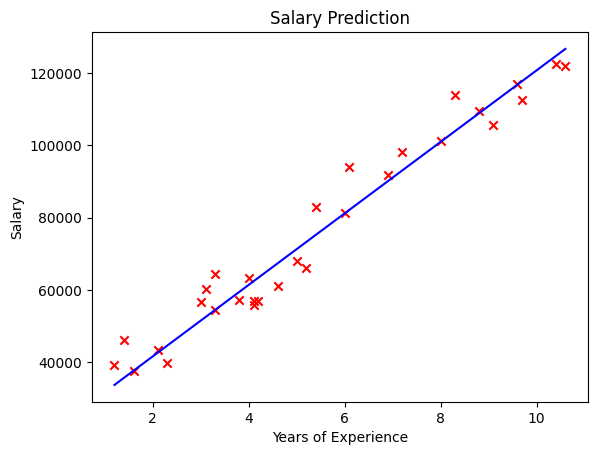

In [48]:
w = 0
b = 0
alpha = 0.01
num_iters = 1000
w, b = gradient_descent(x_train, y_train, w, b, alpha, num_iters)
prediction = w * x_train[0] + b
print("The salary of a person with", x_train[0], "years of experience is", prediction)
#This is an example, now to visualize the prediction line.
plt.scatter(x_train, y_train, c = 'r', marker = 'x')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.plot(x_train, w*x_train + b, c = 'b')
# plt.legend()
plt.show()

In [49]:
# In conclusion, we have successfully implemented Linear Regression with one parameter using Python and Numpy.
# -*- coding: utf-8 -*-

#Formula that was used:
# Linear regression formula: f_wb = w * x + b
# Cost function formula: J(w, b) = 1/2m * sum((fwb - y)**2)
# Gradient Descent formula: w = w - alpha * dj_dw, b = b - alpha * dj_db
 

